## Text Processing for the Novel Jane Eyre

#### Importing Libraries

In [1]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
from nltk.tokenize import word_tokenize

In [2]:
nltk.download('stopwords')

nltk.download('punkt')

nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to C:\Users\Aashi
[nltk_data]     Gupta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Aashi
[nltk_data]     Gupta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Aashi Gupta\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

#### Reading Novel and Converting it in Text Variable

In [3]:
file_eyre = open(r"jane_eyre.txt",encoding='utf-8')
wordslist_eyre = file_eyre.read().splitlines() # to escape \n occurence
wordslist_eyre = [i for i in wordslist_eyre if i!='']
text_eyre = ""
text_eyre = text_eyre.join(wordslist_eyre)


In [4]:
text_eyre[:2000] #first 2000 characters of the novel

'\ufeffThe Project Gutenberg eBook, Jane Eyre, by Charlotte Bronte, Illustratedby F. H. TownsendThis eBook is for the use of anyone anywhere at no cost and withalmost no restrictions whatsoever.  You may copy it, give it away orre-use it under the terms of the Project Gutenberg License includedwith this eBook or online at www.gutenberg.orgTitle: Jane Eyre       an AutobiographyAuthor: Charlotte BronteRelease Date: April 29, 2007  [eBook #1260]Language: EnglishCharacter set encoding: ISO-646-US (US-ASCII)***START OF THE PROJECT GUTENBERG EBOOK JANE EYRE***Transcribed from the 1897 Service & Paton edition by David Price, emailccx074@pglaf.orgJANE EYREAN AUTOBIOGRAPHYBYCHARLOTTE BRONTE_ILLUSTRATED BY F. H. TOWNSEND_LondonSERVICE & PATON5 HENRIETTA STREET1897_The Illustrations__in this Volume are the copyright of_SERVICE & PATON, _London_TOW. M. THACKERAY, ESQ.,This WorkIS RESPECTFULLY INSCRIBEDBYTHE AUTHORPREFACEA preface to the first edition of "Jane Eyre" being unnecessary, I gavenone: 

In [8]:
len(text_eyre)

1028205

### Preprocessing

In [6]:
#Creating a string which has all the punctuations to be removed
punctuations_eyre = '''!()-[]{};:'"\,<>./‘’?“”@#$%^&*_~'''
cleantext_eyre = ""
for char in text_eyre:
    if char not in punctuations_eyre:
        cleantext_eyre = cleantext_eyre + char
        
#Converting the text into lower case         
cleantext_eyre = cleantext_eyre.lower()

In [7]:
cleantext_eyre[:2000] #first 2000 characters of clean text

'\ufeffthe project gutenberg ebook jane eyre by charlotte bronte illustratedby f h townsendthis ebook is for the use of anyone anywhere at no cost and withalmost no restrictions whatsoever  you may copy it give it away orreuse it under the terms of the project gutenberg license includedwith this ebook or online at wwwgutenbergorgtitle jane eyre       an autobiographyauthor charlotte bronterelease date april 29 2007  ebook 1260language englishcharacter set encoding iso646us usasciistart of the project gutenberg ebook jane eyretranscribed from the 1897 service  paton edition by david price emailccx074pglaforgjane eyrean autobiographybycharlotte bronteillustrated by f h townsendlondonservice  paton5 henrietta street1897the illustrationsin this volume are the copyright ofservice  paton londontow m thackeray esqthis workis respectfully inscribedbythe authorprefacea preface to the first edition of jane eyre being unnecessary i gavenone this second edition demands a few words both of acknowle

In [9]:
tokens_eyre_t = word_tokenize(cleantext_eyre)
tokens_eyre_t[:15] #first 15 tokens

['\ufeffthe',
 'project',
 'gutenberg',
 'ebook',
 'jane',
 'eyre',
 'by',
 'charlotte',
 'bronte',
 'illustratedby',
 'f',
 'h',
 'townsendthis',
 'ebook',
 'is']

In [10]:
type(tokens_eyre_t)

list

In [11]:
len(tokens_eyre_t)

171966

#### Visualization

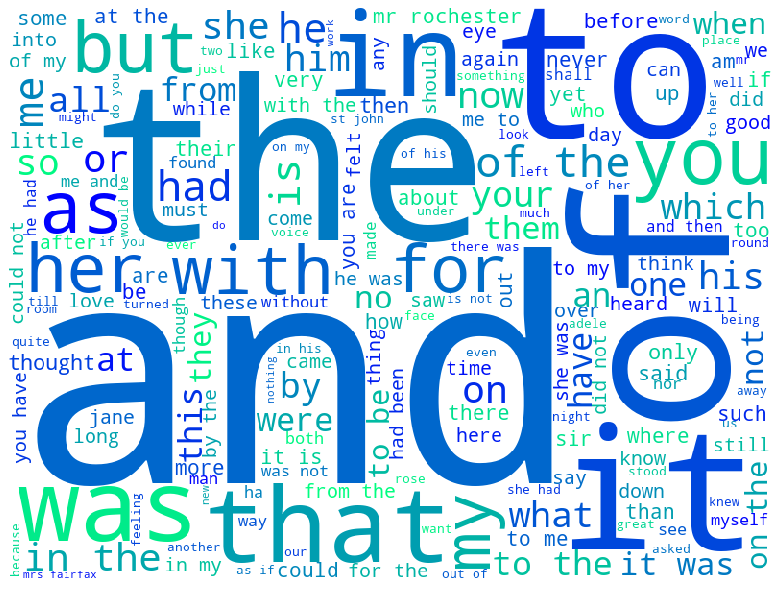

In [12]:
# Word cloud without removing stopwords
wordcloud_eyre_withStopwords = WordCloud(width = 800, height = 600, 
                background_color ='white', 
                min_font_size = 10,stopwords = {},colormap='winter').generate(cleantext_eyre) 

plt.figure(figsize = (12,8), facecolor = None) 
plt.imshow(wordcloud_eyre_withStopwords) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

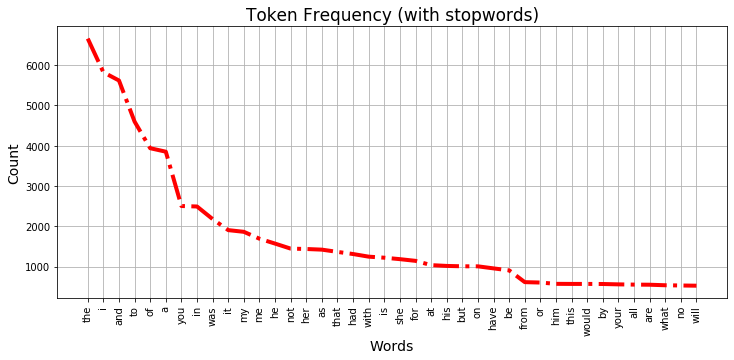

In [13]:
#Frequency Distribution of Token with StopWords

tokens_eyre = word_tokenize(cleantext_eyre)
freq_eyre = nltk.FreqDist(tokens_eyre)
freq_eyre = {k: v for k, v in sorted(freq_eyre.items(), key=lambda item: item[1],reverse=True)}
x = list(freq_eyre.keys())[:40]
y = list(freq_eyre.values())[:40]
plt.figure(figsize=(12,5))
plt.plot(x,y,c='r',lw=4,ls='-.')
plt.grid()
plt.xticks(rotation=90)
plt.title('Token Frequency (with stopwords)',size=17)
plt.xlabel('Words',size=14)
plt.ylabel('Count',size=14)
plt.show()

#### Removing stopwords and Tokenization

In [14]:
# Removing stopwords and storing it into finaltext
stop_words_eyre = set(stopwords.words('english'))
tokens_eyre = word_tokenize(cleantext_eyre)
tokens_final_eyre = [i for i in tokens_eyre if not i in stop_words_eyre] # tokenising with removing stopwords
finaltext_eyre = "  "
finaltext_eyre = finaltext_eyre.join(tokens_final_eyre)

finaltext_eyre[:2000] #first 2000 characters of final text

'\ufeffthe  project  gutenberg  ebook  jane  eyre  charlotte  bronte  illustratedby  f  h  townsendthis  ebook  use  anyone  anywhere  cost  withalmost  restrictions  whatsoever  may  copy  give  away  orreuse  terms  project  gutenberg  license  includedwith  ebook  online  wwwgutenbergorgtitle  jane  eyre  autobiographyauthor  charlotte  bronterelease  date  april  29  2007  ebook  1260language  englishcharacter  set  encoding  iso646us  usasciistart  project  gutenberg  ebook  jane  eyretranscribed  1897  service  paton  edition  david  price  emailccx074pglaforgjane  eyrean  autobiographybycharlotte  bronteillustrated  f  h  townsendlondonservice  paton5  henrietta  street1897the  illustrationsin  volume  copyright  ofservice  paton  londontow  thackeray  esqthis  workis  respectfully  inscribedbythe  authorprefacea  preface  first  edition  jane  eyre  unnecessary  gavenone  second  edition  demands  words  acknowledgment  andmiscellaneous  remarkmy  thanks  due  three  quartersto

#### Visualization

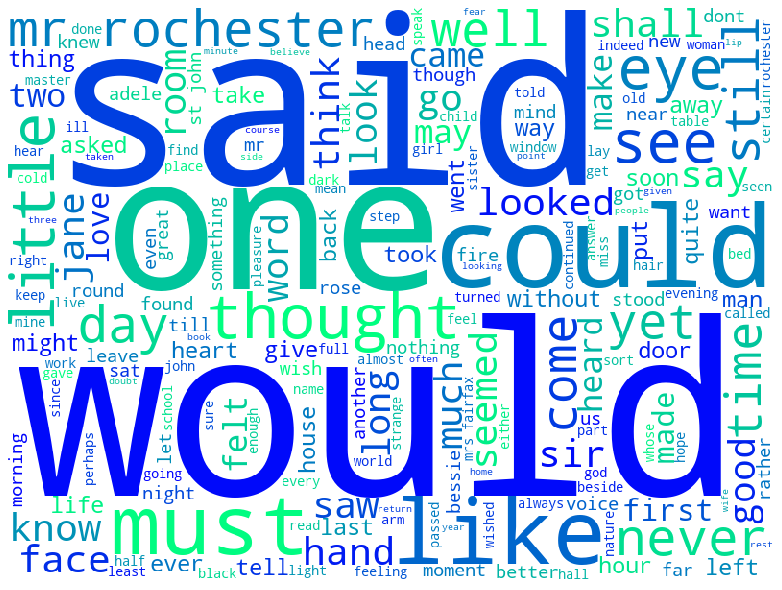

In [15]:
# Word cloud with removing stopwords
wordcloud_eyre_withoutStopWords = WordCloud(width = 800, height = 600, 
                background_color ='white', 
                min_font_size = 10,stopwords = {},colormap='winter').generate(finaltext_eyre) 

plt.figure(figsize = (12,8), facecolor = None) 
plt.imshow(wordcloud_eyre_withoutStopWords) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

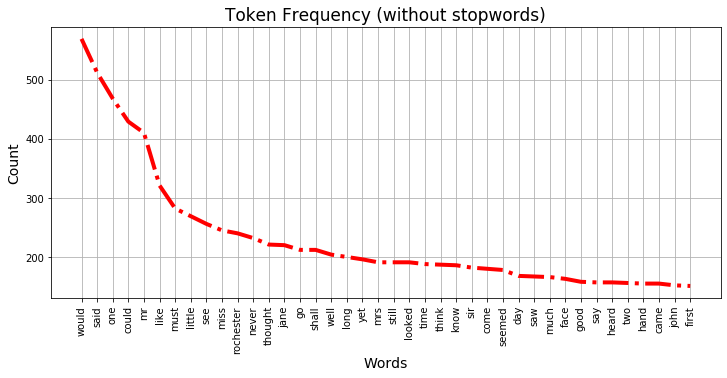

In [21]:
#Frequency Distribution of Tokens without StopWords

tokens_eyre = word_tokenize(finaltext_eyre)
tokens_eyre = [i for i in tokens_eyre if not i in stop_words_eyre]
freq_eyre = nltk.FreqDist(tokens_eyre)
freq_eyre = {k: v for k, v in sorted(freq_eyre.items(), key=lambda item: item[1],reverse=True)}
x = list(freq_eyre.keys())[:40]
y = list(freq_eyre.values())[:40]
plt.figure(figsize=(12,5))
plt.plot(x,y,c='r',lw=4,ls='-.')
plt.grid()
plt.xticks(rotation=90)
plt.title('Token Frequency (without stopwords)',size=17)
plt.xlabel('Words',size=14)
plt.ylabel('Count',size=14)
plt.show()

### PoS Tagging and Frequency Distribution of Tags over Text

In [17]:
tagged_eyre = nltk.pos_tag(tokens_eyre) 
tagged_eyre[:15] #first 15 tags

[('\ufeffthe', 'NN'),
 ('project', 'NN'),
 ('gutenberg', 'NN'),
 ('ebook', 'NN'),
 ('jane', 'NN'),
 ('eyre', 'NN'),
 ('charlotte', 'NN'),
 ('bronte', 'NN'),
 ('illustratedby', 'NN'),
 ('f', 'NN'),
 ('h', 'NN'),
 ('townsendthis', 'NN'),
 ('ebook', 'NN'),
 ('use', 'NN'),
 ('anyone', 'NN')]

In [20]:
type(tagged_eyre)

list

In [19]:
from collections import Counter
counts_eyre = Counter( tag for word,  tag in tagged_eyre)
print(counts_eyre)

Counter({'NN': 29678, 'JJ': 16971, 'VBD': 7900, 'RB': 6534, 'NNS': 6488, 'VBP': 3692, 'VBN': 3378, 'VBG': 2973, 'VB': 2915, 'MD': 1828, 'IN': 1723, 'CD': 911, 'VBZ': 842, 'JJR': 290, 'JJS': 255, 'DT': 224, 'RBR': 201, 'WP': 171, 'PRP': 160, 'RP': 122, 'FW': 93, 'CC': 91, 'NNP': 59, 'WP$': 58, 'WDT': 35, 'WRB': 24, 'EX': 13, 'UH': 10, 'RBS': 8, 'PRP$': 5, 'PDT': 1, 'POS': 1})


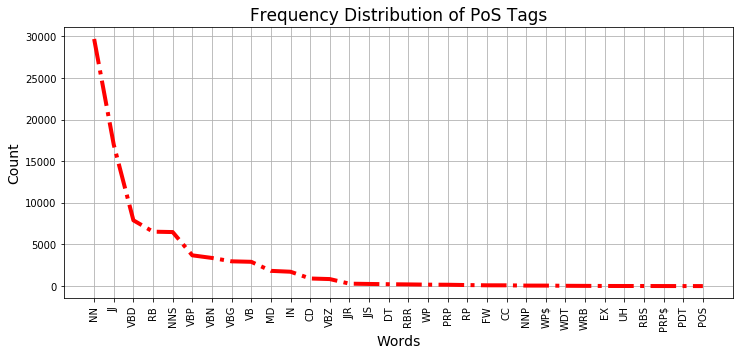

In [22]:
#Frequency Distribution of PoS Tags

freq_tags_eyre = nltk.FreqDist(counts_eyre)
freq_tags_eyre = {k: v for k, v in sorted(freq_tags_eyre.items(), key=lambda item: item[1],reverse=True)}
x = list(freq_tags_eyre.keys())[:40]
y = list(freq_tags_eyre.values())[:40]
plt.figure(figsize=(12,5))
plt.plot(x,y,c='r',lw=4,ls='-.')
plt.grid()
plt.xticks(rotation=90)
plt.title('Frequency Distribution of PoS Tags',size=17)
plt.xlabel('Words',size=14)
plt.ylabel('Count',size=14)
plt.show()

### For Word length vs Frequency Relation

In [23]:
import numpy as np
bin_size=np.linspace(0,16)

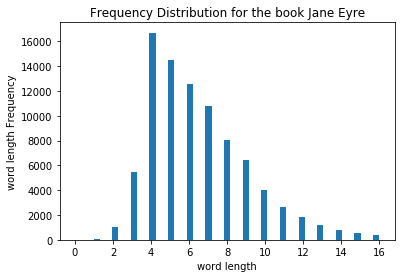

In [24]:
#Finding Wordlength and storing it as a list
wordLength_eyre = [len(r) for r in tokens_eyre]

#Plotting histogram of Word length vs Frequency
plt.hist(wordLength_eyre, bins=bin_size)
plt.xlabel('word length')
plt.ylabel('word length Frequency')
plt.title('Frequency Distribution for the book Jane Eyre')
plt.show()

In [25]:
# End of Code :)) 